## Sklearn -Matplotlib-PCA

Pradedame dirbti su duomenimis.

- Kursime įvairius sintetinius duomenų rinkinius
- Atvaizduosime juos 2D ir 3D plokštumose
- Atliksime PCA

In [1]:
#įsikeliame reikalingas bibliotekas

import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [6]:
#Sukurkime savo sintetinį duomenų rinkinį :)

# Rinkinys susidarys iš 500 taškų (datapoints), kurių kiekvienas turės po 2 savybes (features), susidarys 2 klasės.
# kiekviena klasė suformuos po 1 klasterį.

# X - mūsų turimi duomenų taškai (datapoints), y - kiekvienam taškui priskirta žymė (label). 

# Kadangi yra 2 klasės - kiekvienas duomenų taškas priklausys 0 arba 1 klasei.

n_classes = 2
X, y = datasets.make_classification(n_classes=n_classes, 
                                    n_samples=500, 
                                    n_features=2, 
                                    n_informative=2, # kiek savybių bus informatyvių
                                    n_redundant=0,
                                    n_clusters_per_class=1, 
                                    random_state=7)#kad visi gautume vienodus duomenis

In [4]:
#Patyrinėkime duomenis



print('Data shape: {}'.format(X.shape))
print('Labels shape: {}'.format(y.shape))
print('First 10 datapoints: ')
print(X[:10])
print('First 10 labels: ')
print(y[:10])

Data shape: (500, 2)
Labels shape: (500,)
First 10 datapoints: 
[[-0.94472343  0.89119429]
 [ 0.6703211  -1.46964894]
 [-0.31583033  1.64404613]
 [ 1.31699393 -0.53141429]
 [-0.43337857  1.96880476]
 [ 0.76264774 -1.26402318]
 [-1.06455459  1.58367255]
 [-0.43959317  2.16030739]
 [ 1.02446526 -1.01549923]
 [-0.64070389  2.48845571]]
First 10 labels: 
[1 0 1 0 1 0 1 1 0 1]


In [5]:
# np.where veikimas - randame elementus masyve, tenkinančius mūsų sąlygas
a = [0, 1, 1, 0, 1]
a = np.array(a)

print(np.where(a == 1))

(array([1, 2, 4], dtype=int64),)


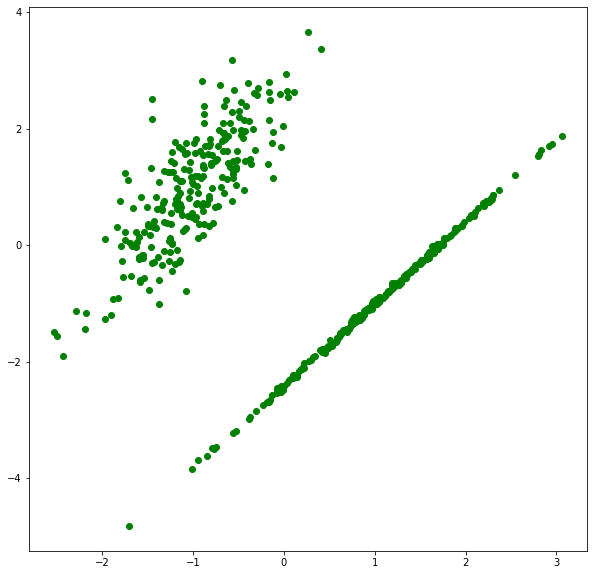

In [8]:
#Atvaizduokime duomenis



for i in range(n_classes): 
    rows = np.where(y == i)
    if i == 0:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[rows, 0], X[rows, 1], c = color)

## Užduotis:

1.Sukurkite duomenų rinkinį iš 200 taškų, kurių kiekvienas turi po dvi savybes ir gali priklausyti vienai iš trijų klasių. Klasių skaičius turi sutapti su klasterių skaičiumi.


2.Atvaizduokite

In [22]:
n_classes = 3
X, y = datasets.make_classification(n_classes=n_classes, 
                                    n_samples=200, 
                                    n_features=2, 
                                    n_informative=2, # kiek savybių bus informatyvių
                                    n_redundant=0,
                                    n_clusters_per_class=1, 
                                    random_state=7) # kad visi gautume vienodus duomenis

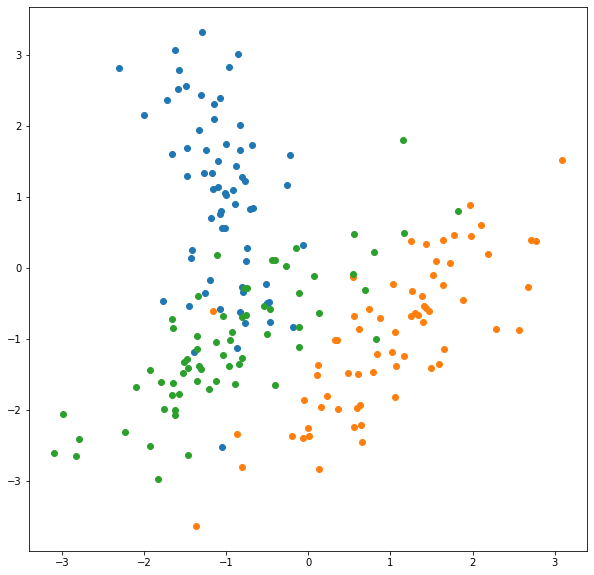

In [23]:
for i in range(n_classes): 
    rows = np.where(y == i)
    plt.scatter(X[rows, 0], X[rows, 1])

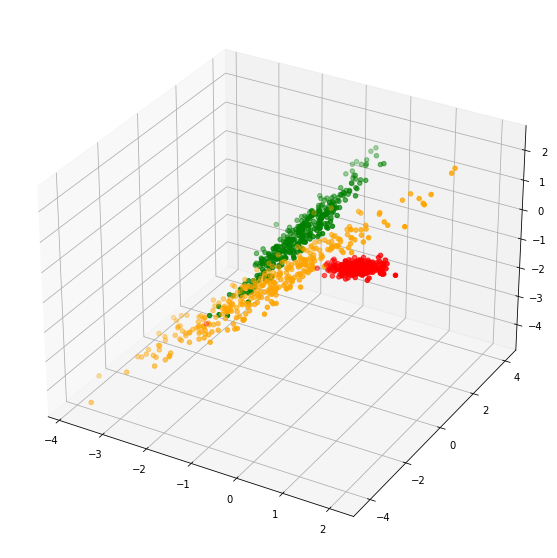

In [58]:
#Galime atvaizduoti ir 3D taškus

ax = plt.axes(projection='3d')


X, y = datasets.make_classification(n_classes=3, 
                                    n_samples=1000, 
                                    n_features=3, 
                                    n_informative=2, 
                                    n_redundant=1, 
                                    n_clusters_per_class=1, 
                                    random_state=7)




for i in range(4):
    rows = np.where(y == i)
    # create scatter of these samples
    if i == 0:
        c = 'red'
    elif i == 1:
        c = 'green'
    elif i == 2:
        c = 'orange'
    else:
        c = 'blue'
    ax.scatter3D(X[rows, 0], X[rows, 1], X[rows, 2], c=c);


## PCA pavyzdys

In [28]:
#Sukurkime savo sintetinį duomenų rinkinį :)

# Rinkinys susidarys iš 1000 taškų (datapoints), kurių kiekvienas turės po 10 savybių (features), susidarys 4 klasės.
# kiekviena klasė suformuos po 1 klasterį.

# X - mūsų turimi duomenų taškai (datapoints), y - kiekvienam taškui priskirta žymė (label). 

# Kadangi yra 4 klasės - kiekvienas duomenų taškas priklausys 0, 1, 2, arba 3 klasei.


X, y = datasets.make_classification(n_classes=4, n_samples=1000, n_features=10, n_informative=4, n_redundant=6, n_clusters_per_class=1, random_state=7)

In [29]:
#Patyrinėkime duomenis



print('Data shape: {}'.format(X.shape))
print('Labels shape: {}'.format(y.shape))

Data shape: (1000, 10)
Labels shape: (1000,)


In [30]:
print('First 10 datapoints: ')
print(X[:10])

First 10 datapoints: 
[[-4.27342431  4.64136118 -1.86580364  1.47721714  0.55783067 -2.86063298
   0.41442333 -1.16892913 -2.29274346  1.73408508]
 [-1.45228903  1.06726466 -1.55850521  0.44465383  0.21376095  0.81599093
  -0.0316399  -0.59863769  1.1013797  -0.72229887]
 [-3.08906346  3.53288396 -1.13951732  1.11987416 -0.11263125 -2.47093786
  -0.20454093 -1.49343781 -1.41885673  0.96619448]
 [-2.7820715   2.86546107 -1.44854393  0.77044359  0.87924552 -1.56310298
   0.73635928 -0.21969154 -1.71199033  1.50550132]
 [ 1.18838787 -1.11304162  0.82497953 -0.86874756  0.63616759 -0.25693335
   0.69434754  1.17303357 -1.12069331  1.24365796]
 [-1.18593285  1.4097438  -1.24939553 -1.39485702 -0.35114653 -1.35925738
  -1.00498056 -2.5208154   1.1211312   0.47332886]
 [-2.71318194  2.53681808 -1.87960348  0.35639998  1.53077309 -0.97053003
   1.26008302  0.35114258 -1.65235204  1.84811743]
 [-3.24742218  4.46442322  0.64330442  4.15910236 -3.47278437 -3.26975136
  -2.77285897 -3.74277009 -0.

In [31]:
print('First 10 labels: ')
print(y[:10])

First 10 labels: 
[3 2 3 3 1 0 3 3 3 2]


In [33]:
#Atliekame PCA

pca = decomposition.PCA(n_components=3) 

pca.fit(X)

X_reduced = pca.transform(X)

In [36]:
print(X_reduced)

[[ 6.55123126 -1.30373858 -0.51739909]
 [ 0.24135488  1.24531447  2.03286231]
 [ 4.56672501 -0.12959462 -1.04336062]
 ...
 [-4.29058419  6.79646628 -0.58685902]
 [-0.51209854 -1.17249145  1.25883356]
 [-1.49617745  1.18200675  1.88567757]]


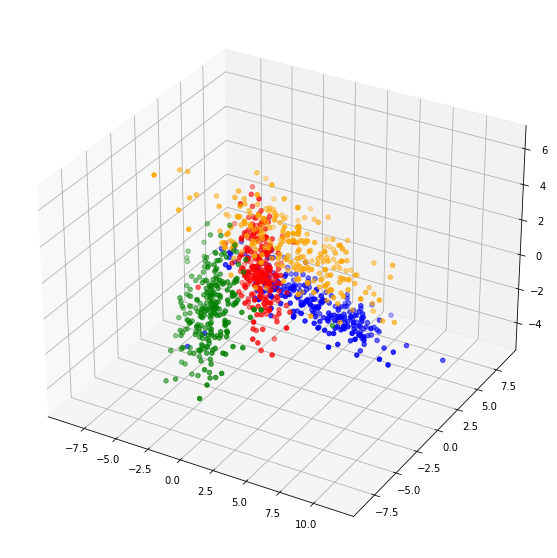

In [34]:
ax = plt.axes(projection='3d')


for i in range(4):
    rows = np.where(y == i)
    # create scatter of these samples
    if i == 0:
        c = 'red'
    elif i == 1:
        c = 'green'
    elif i == 2:
        c = 'orange'
    else:
        c = 'blue'
    ax.scatter3D(X_reduced[rows, 0], X_reduced[rows, 1], X_reduced[rows, 2], c=c);



In [37]:
#Atliekame PCA tačiau mažiname į dar mažesnę erdvę

pca = decomposition.PCA(n_components=2) 

pca.fit(X)

X_reduced = pca.transform(X)

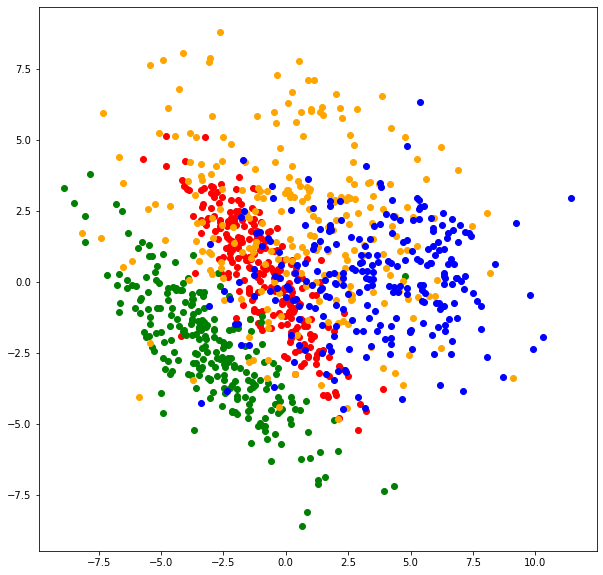

In [38]:
#Atvaizduokime duomenis

for i in range(4): 
    rows = np.where(y == i)
    if i == 0:
        c = 'red'
    elif i == 1:
        c = 'green'
    elif i == 2:
        c = 'orange'
    else:
        c = 'blue'
    plt.scatter(X_reduced[rows, 0], X_reduced[rows, 1], c = c)

## Užduotis:

1.Sukurkite duomenų rinkinį iš 500 taškų, kurių kiekvienas turi po dvi 20 savybių ir gali priklausyti vienai iš trijų klasių. Klasių skaičius turi sutapti su klasterių skaičiumi.

2.Atlikite PCA analizę. Išskirkite 2 arba 3 komponentes

2.Atvaizduokite gautus rezultatus

In [52]:
n_classes = 3
X, y = datasets.make_classification(n_classes=n_classes, 
                                    n_samples=500, 
                                    n_features=20, 
                                    n_informative=4, 
                                    n_redundant=6, 
                                    n_clusters_per_class=1, 
                                    random_state=7)

In [53]:
pca = decomposition.PCA(n_components=3) 

pca.fit(X)

X_reduced = pca.transform(X)

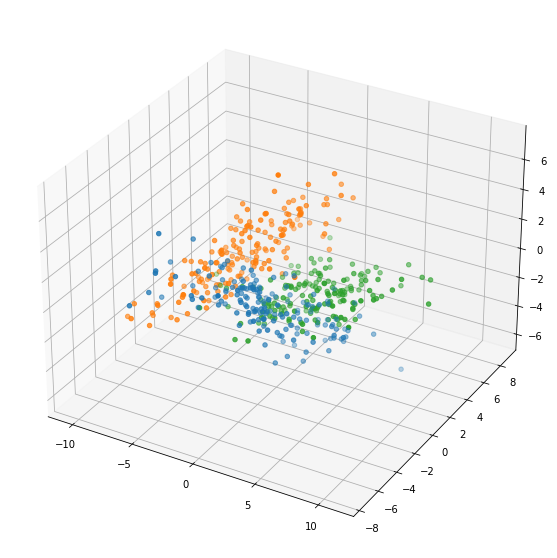

In [54]:
#Atvaizduokime duomenis
ax = plt.axes(projection='3d')

for i in range(n_classes):
    rows = np.where(y == i)
    ax.scatter3D(X_reduced[rows, 0], X_reduced[rows, 1],  X_reduced[rows, 2])

In [55]:
pca = decomposition.PCA(n_components=2) 

pca.fit(X)

X_reduced = pca.transform(X)

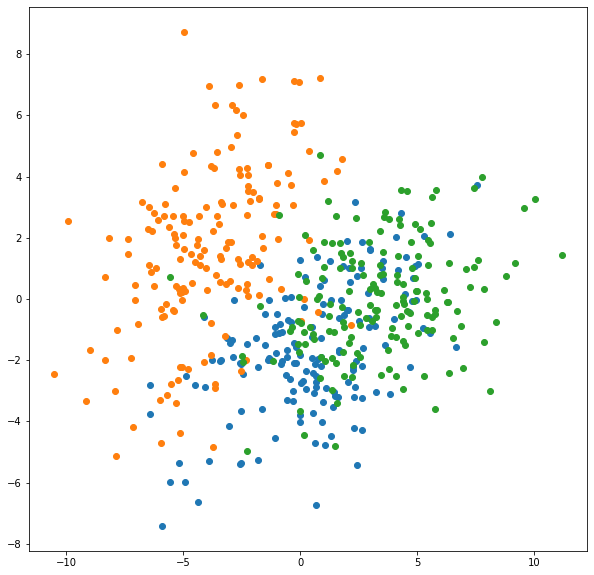

In [56]:
for i in range(n_classes):
    rows = np.where(y == i)
    plt.scatter(X_reduced[rows, 0], X_reduced[rows, 1])